# Анализ оттока пользователей 

In [170]:
import numpy as np
import pandas as pd
import scipy 
import math
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

### Получение данных

In [108]:
data = pd.read_csv('churn_analysis.csv')
data.head()

,Unnamed: 0,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,0,KS,128,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,1,OH,107,415,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,2,NJ,137,415,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,3,OH,84,408,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,4,OK,75,415,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


In [6]:
data.describe()

,Unnamed: 0,account_length,area_code,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim
count,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,1666.00000,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.990999,0.484236
std,962.29855,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.819138,0.138560
min,0.00000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000
25%,833.00000,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,0.390000
50%,1666.00000,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,1.000000,0.480000
75%,2499.00000,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,2.000000,0.580000
max,3332.00000,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,2.000000,0.960000


Выделим контрольную группу

$\textbf{№1}$

$\chi^2$

In [179]:
data_control = data[data.treatment == 1]

In [141]:
pivot = pd.crosstab(data_control['churn'], data_control['state'])
pivot.loc[:, ['AK', 'AL']]

state,AK,AL
churn,,
False.,19,25
True.,1,5


In [146]:
i = -1
j = -1
counter = 0
p = 0.
for state1 in pivot.columns:
    i += 1
    for state2 in pivot.columns:
        j += 1
        if j <= i:
            continue
        pv = scipy.stats.chi2_contingency(pivot.loc[:, [state1, state2]], correction=False)[1]
        if pv < 0.05:
            counter += 1
        p += pv
    j = -1
print counter, pv / 1275

34 0.000378387397954


$\textbf{№2}$

* Нужна поправка на множественную проверку гипотез. 
* Условия для $\chi^2$

$\textbf{№3}$

$\chi^2$ с поправкой

In [144]:
i = -1
j = -1
counter = 0
for state1 in pivot.columns:
    i += 1
    for state2 in pivot.columns:
        j += 1
        if j <= i:
            continue
        pv = scipy.stats.chi2_contingency(pivot.loc[:, [state1, state2]], correction=True)[1]
        if pv < 0.05:
            counter += 1
    j = -1
print counter

0


* В среднем достигаемый уровенень значимости на наших данных увеличился.

$\textbf{№4}$

Точный критерий Фишера

In [147]:
i = -1
j = -1
counter = 0
p = 0.
for state1 in pivot.columns:
    i += 1
    for state2 in pivot.columns:
        j += 1
        if j <= i:
            continue
        pv = scipy.stats.fisher_exact(pivot.loc[:, [state1, state2]])[1]
        if pv < 0.05:
            counter += 1
        p += pv
    j = -1
print counter, p / 1275

10 0.648338306002


* С ростом выборки преимущества данного критерия над $\chi^2$ уменьшаются
* В среднем достигаемый уровень значимости меньше, чем $\chi^2$ с поправкой.
* В среднем достигаемый уровень значимости $\textit{значительно}$ больше, чем с $\chi^2$ без поправки.

$\textbf{№5}$

Корреляция Пирсона

In [214]:
def check_p(st_cr):
    return 2 * (1. - stats.norm.cdf(abs(st_cr)))

In [215]:
corr = data[['day_calls', 'mes_estim']].corr().iloc[1][0]
print 'r = ', corr

r =  -0.0517943505876


In [216]:
n = data.shape[0]
st_cr = (corr * math.sqrt(n-2)) / math.sqrt(1 - corr**2)
print 'p =', check_p(st_cr)

p = 0.00275961017206


$\textbf{№6}$

Корреляция Спирмена

In [217]:
corr = data[['day_calls', 'mes_estim']].corr(method='spearman').iloc[1][0]
print 'r = ', corr

r =  0.0433498805339


In [219]:
n = data.shape[0]
st_cr = (corr * math.sqrt(n-2)) / math.sqrt(1 - corr**2)
print 'p =', check_p(st_cr)

p = 0.0122699315625


$\textbf{№7}$

(0.13861708020693372, 0.48423642364236419, 0.99960504839853292)

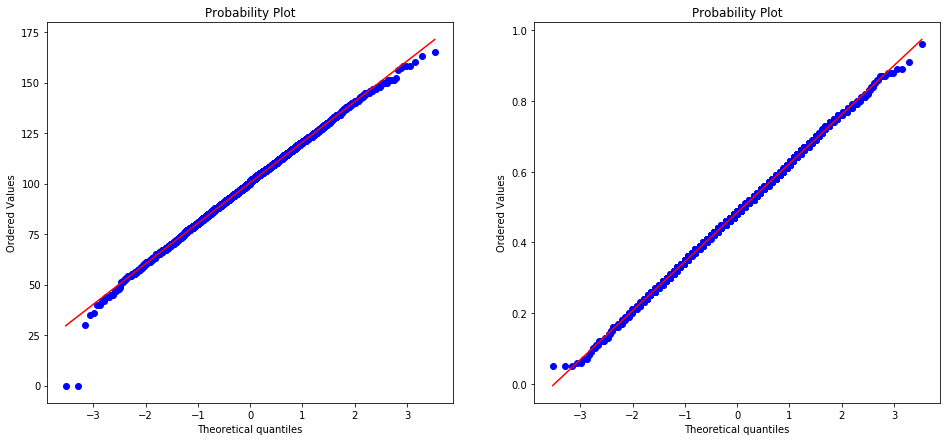

In [178]:
plt.figure(figsize=(16,7))
plt.subplot(121)
scipy.stats.probplot(data['day_calls'], plot=plt)[1]
plt.subplot(122)
scipy.stats.probplot(data['mes_estim'], plot=plt)[1]

* Корреляции противоречивы, нужно взглянуть на данные как-то по-другому

$\textbf{№8}$

Корреляция Крамера

In [180]:
pivot 

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
churn,,,,,,,,,,,,,,,,,,,,,
False.,19,25,11,17,10,17,25,18,16,18,...,20,11,14,18,20,18,16,22,27,20
True.,1,5,5,2,5,5,5,1,1,2,...,3,1,6,4,3,5,7,2,5,2


In [183]:
n = data_control.shape[0]
math.sqrt(stats.chi2_contingency(pivot)[0]/(n)), stats.chi2_contingency(pivot)[1]

(0.2003932150203332, 0.70975900427784699)

* Но он полагается на $\chi^2$.

$\textbf{№9}$